<a href="https://colab.research.google.com/github/ananthakrishnanpta/World_Happiness_Report/blob/main/World_happiness_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1  align = center> <font color = "green">W</font>orld <font color = "blue">H</font>appiness <font color = "purple">R</font>eport</h1>

<hr align = center width = 80%>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', color_codes = True)
from sklearn import preprocessing
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [3]:
import sys, os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Kaggle projects/World Happiness Report/')

In [4]:
a = pd.read_csv('2015.csv')
b = pd.read_csv('2016.csv')
c = pd.read_csv('2017.csv')
d = pd.read_csv('2018.csv')
e = pd.read_csv('2019.csv')

<center><h1> Checking the Given datasets for common features </h1>
</center>


In [5]:
a.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
b.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [7]:
c.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [8]:
d.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [9]:
e.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


<hr><font color = "skyblue"><center>Altering column names to match each other</center></font><hr>


In [10]:
a.rename(columns = {'Happiness Rank':'rank','Happiness Score':'Score','Economy (GDP per Capita)':'GDP','Health (Life Expectancy)':'Life_expectancy','Trust (Government Corruption)':'Trust'},inplace = True)

In [11]:
b.rename(columns = {'Happiness Rank':'rank','Happiness Score':'Score','Economy (GDP per Capita)':'GDP','Health (Life Expectancy)':'Life_expectancy','Trust (Government Corruption)':'Trust'},inplace = True)

In [12]:
c.rename(columns = {'Happiness.Rank':'rank','Happiness.Score':'Score','Economy..GDP.per.Capita.':'GDP','Health..Life.Expectancy.':'Life_expectancy','Trust..Government.Corruption.':'Trust'},inplace = True)

In [13]:
d.rename(columns = {'Country or region':'Country','Overall rank':'rank','Social support':'Family','Healthy life expectancy':'Life_expectancy', 'Freedom to make life choices':'Freedom','Perceptions of corruption':'Trust','GDP per capita':'GDP'}, inplace = True)

In [14]:
e.rename(columns = {'Overall rank':'rank','Country or region':'Country','GDP per capita':'GDP','Social support':'Family','Healthy life expectancy':'Life_expectancy','Freedom to make life choices':'Freedom','Perceptions of corruption':'Trust'},inplace = True)

In [15]:
a = a[['GDP','Trust','Life_expectancy','Family','Country','Freedom','Generosity','Score']]
b = b[['GDP','Trust','Life_expectancy','Family','Country','Freedom','Generosity','Score']]
c = c[['GDP','Trust','Life_expectancy','Family','Country','Freedom','Generosity','Score']]
d = d[['GDP','Trust','Life_expectancy','Family','Country','Freedom','Generosity','Score']]
e = e[['GDP','Trust','Life_expectancy','Family','Country','Freedom','Generosity','Score']]

<hr>

## <center><font color='pink'>Concatenating all datasets together</font></center>
<hr>

In [16]:
# concatenating dataframes
display('After concatenating:')
df = pd.concat([a,b,c,d,e],ignore_index = True)
display(df)


'After concatenating:'

,GDP,Trust,Life_expectancy,Family,Country,Freedom,Generosity,Score
0,1.39651,0.41978,0.94143,1.34951,Switzerland,0.66557,0.29678,7.587
1,1.30232,0.14145,0.94784,1.40223,Iceland,0.62877,0.43630,7.561
2,1.32548,0.48357,0.87464,1.36058,Denmark,0.64938,0.34139,7.527
3,1.45900,0.36503,0.88521,1.33095,Norway,0.66973,0.34699,7.522
4,1.32629,0.32957,0.90563,1.32261,Canada,0.63297,0.45811,7.427
...,...,...,...,...,...,...,...,...
777,0.35900,0.41100,0.61400,0.71100,Rwanda,0.55500,0.21700,3.334
778,0.47600,0.14700,0.49900,0.88500,Tanzania,0.41700,0.27600,3.231
779,0.35000,0.02500,0.36100,0.51700,Afghanistan,0.00000,0.15800,3.203
780,0.02600,0.03500,0.10500,0.00000,Central African Republic,0.22500,0.23500,3.083


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GDP              782 non-null    float64
 1   Trust            781 non-null    float64
 2   Life_expectancy  782 non-null    float64
 3   Family           782 non-null    float64
 4   Country          782 non-null    object 
 5   Freedom          782 non-null    float64
 6   Generosity       782 non-null    float64
 7   Score            782 non-null    float64
dtypes: float64(7), object(1)
memory usage: 49.0+ KB


In [18]:
# for col in df.columns:
#   sns.distplot(df[col], bins=25)

<hr>
<ul>
<li>Checking for missing values</li>
<li>Filling missing values with mean of feature values</li
</ul>

<hr>

In [19]:
df.isna().sum()

GDP                0
Trust              1
Life_expectancy    0
Family             0
Country            0
Freedom            0
Generosity         0
Score              0
dtype: int64

In [20]:
df['Trust']=df['Trust'].fillna(df['Trust'].mean())

In [21]:
df.isna().sum()

GDP                0
Trust              0
Life_expectancy    0
Family             0
Country            0
Freedom            0
Generosity         0
Score              0
dtype: int64

In [22]:
df

,GDP,Trust,Life_expectancy,Family,Country,Freedom,Generosity,Score
0,1.39651,0.41978,0.94143,1.34951,Switzerland,0.66557,0.29678,7.587
1,1.30232,0.14145,0.94784,1.40223,Iceland,0.62877,0.43630,7.561
2,1.32548,0.48357,0.87464,1.36058,Denmark,0.64938,0.34139,7.527
3,1.45900,0.36503,0.88521,1.33095,Norway,0.66973,0.34699,7.522
4,1.32629,0.32957,0.90563,1.32261,Canada,0.63297,0.45811,7.427
...,...,...,...,...,...,...,...,...
777,0.35900,0.41100,0.61400,0.71100,Rwanda,0.55500,0.21700,3.334
778,0.47600,0.14700,0.49900,0.88500,Tanzania,0.41700,0.27600,3.231
779,0.35000,0.02500,0.36100,0.51700,Afghanistan,0.00000,0.15800,3.203
780,0.02600,0.03500,0.10500,0.00000,Central African Republic,0.22500,0.23500,3.083


# <font color = "lightgrey">Univariate Analysis :- </font>

In [23]:
def plot_box(df,col_name):
  plt.figure(figsize = (5,5))
  sns.boxplot(df[col_name])
  plt.show()

def remove_outliers(df,col_name):
  print("Box plot before removing outliers: ")
  plot_box(df,col_name)
  print("\n\n")
  
  q1, q2, q3 = np.percentile(df[col_name],[25,50,75])
  int_quart_range = q3 - q1
  df = df[df[col_name] > (q1 - (int_quart_range * 1.5))]
  df = df[df[col_name] <(q3 + (int_quart_range *1.5))]
  
  print("Box plot after removing outliers: ")
  plot_box(df,col_name)
  print("\n\n")
  return df

In [24]:
# for i in df.columns:
#   fig, ax = plt.subplots(df.shape[0])
#   print(sns.displot(df[i]))

In [25]:
# for i in df.columns:
#   plot_box(df,i)

<hr><h2>
<font color = "pink">Multi-variate analysis</font>
</h2>
<hr>

- Checking for correlation 
- Using heatmap to visualize the correlation

In [26]:
data_corr=df.corr()

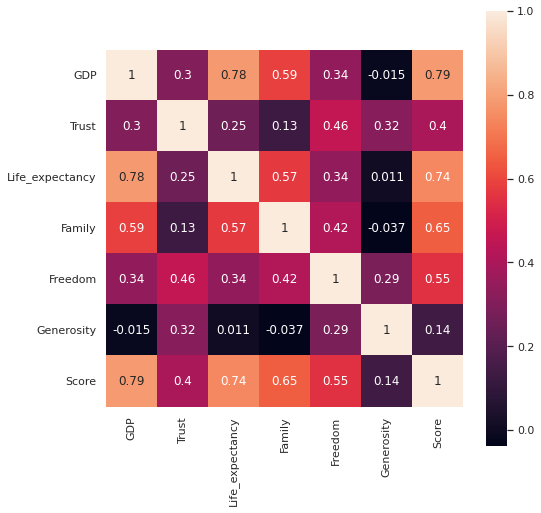

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,square=True)

<h2> <font color = #1CF6EF>Encoding 'Country' Column :-</font></h2>

In [28]:
cat_val = df.columns[df.dtypes == 'object']
df=pd.get_dummies(df,columns=cat_val)

In [30]:
df

,GDP,Trust,Life_expectancy,Family,Freedom,Generosity,Score,Country_Afghanistan,Country_Albania,Country_Algeria,...,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,1.39651,0.41978,0.94143,1.34951,0.66557,0.29678,7.587,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.30232,0.14145,0.94784,1.40223,0.62877,0.43630,7.561,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.32548,0.48357,0.87464,1.36058,0.64938,0.34139,7.527,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.45900,0.36503,0.88521,1.33095,0.66973,0.34699,7.522,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.32629,0.32957,0.90563,1.32261,0.63297,0.45811,7.427,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,0.35900,0.41100,0.61400,0.71100,0.55500,0.21700,3.334,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,0.47600,0.14700,0.49900,0.88500,0.41700,0.27600,3.231,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,0.35000,0.02500,0.36100,0.51700,0.00000,0.15800,3.203,1,0,0,...,0,0,0,0,0,0,0,0,0,0
780,0.02600,0.03500,0.10500,0.00000,0.22500,0.23500,3.083,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<hr color = "red" width = "80%" align = "left">

# Creating separate dataframes of Predictor and Target variables : -

<hr width = "80%" align = "left">

In [31]:
x = df.drop(['Score'],axis=1)
y = df['Score']



<hr width = "16.5%". align = left>

<h2 align = left> Train-Test Split :- </h2>
<hr width = "16.5%". align = left>

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state = 2)

<h1 align = center> <font color = "red">L</font>inear <font color="red">R</font>egression : Predicting and evaluating the model :- </h1>

<hr color = "grey">

In [32]:

lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
model_score=lr.score(x_test,y_test)
print('Mean Absolute Error of linear regression:',mean_absolute_error(pred,y_test))
print("r2 score is :- ",r2_score(pred,y_test))
print('Model_score is :- ',model_score)
print('Mean Squared error is :- ',mean_squared_error(pred,y_test))

Mean Absolute Error of linear regression: 0.2216704727957727
r2 score is :-  0.9140051539380899
Model_score is :-  0.9252606196209169
Mean Squared error is :-  0.1076766354313119


In [33]:
predicted = pd.DataFrame(pred,y_test)
predicted

,0
Score,
4.857,5.174272
7.501,7.431760
5.589,5.553476
5.458,5.370824
6.867,6.988293
...,...
4.236,4.402926
2.905,3.164819
3.794,3.464587


Fitting the data 

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -0.332 (0.034)


<h1 align = center> <font color = "skyblue">R</font>andom <font color = "skyblue">F</font>orest Regression : Predicting and evaluating the model :-</h1>

<hr color = "skyblue">

In [35]:
from sklearn import metrics
model.fit(x_train,y_train)
y_pred_r = model.predict(x_test)


print("r2 score is :- ",r2_score(y_pred_r,y_test))

r2 score is :-  0.8184515722834592


<h1 align = center> <font color = "lightgreen">Visualization of performance difference between two models :-</font></h1>
<hr width = "50%" color = "violet">

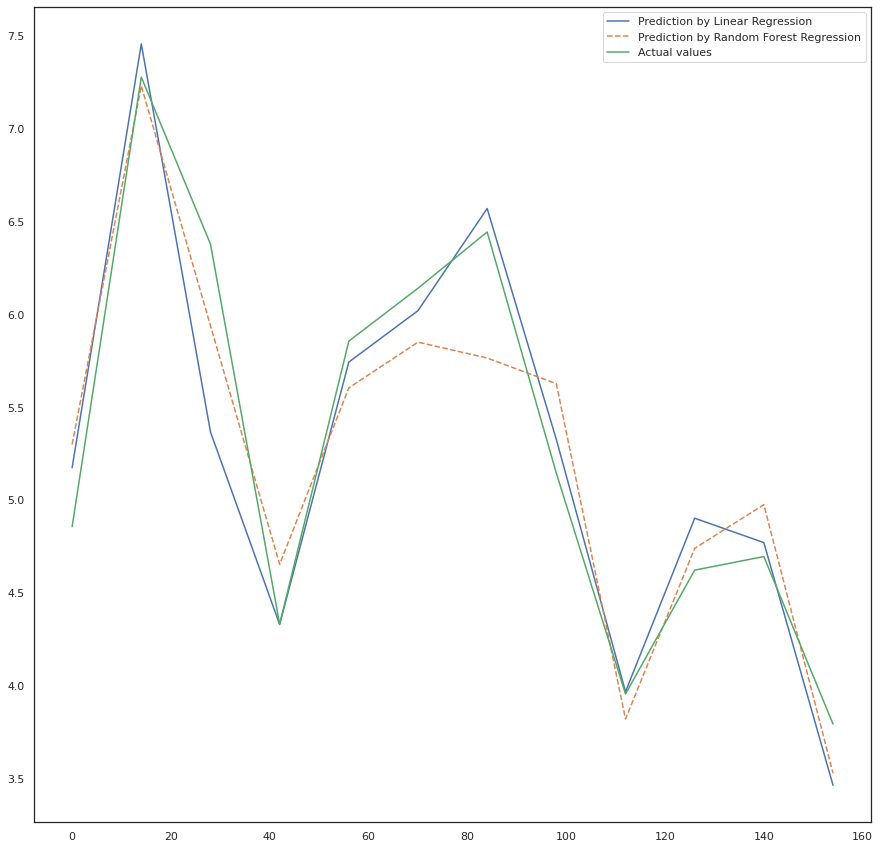

In [38]:
plt.figure(figsize = (15,15))
x = np.arange(0,(y_test.shape)[0],14)
y1 = pred[x]
y2 = y_pred_r[x]
y_test = np.array(y_test)
y3 = y_test[x]
plt.plot(x,y1,label = "Prediction by Linear Regression",linestyle='-')
plt.plot(x,y2,label = "Prediction by Random Forest Regression",linestyle='--')
plt.plot(x,y3,label = "Actual values")
plt.legend()
plt.show()